In [1]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import numpy as np
import matplotlib.pyplot as plt
from Mapping import *
from PIL import Image
from get_time_interval_data import *
from PCA import *
from Plot import *
import pickle

### Data
annotation:
- `active_event_name_DOA`: DOAs of all selected arrays without time index, all arrays are active
- `active_event_name_matrix_data`: modified matrix data from database that includes time index, all selected arrays are active

In [2]:
# the first 5 points
desk_spe = get_time_interval_matrix_data("Jan 02 2021 02:10PM", "Jan 02 2021 02:15PM")

# last point
last_point = get_time_interval_matrix_data("Jan 02 2021 02:15PM", "Jan 02 2021 02:16PM")

# array 5
array_5_x = desk_spe[:,16]
array_5_y = desk_spe[:,17]
array_5_z = desk_spe[:,18]

# doing np.where == 0
array_5_x_0_indices = np.where(array_5_x==0)
array_5_y_0_indices = np.where(array_5_y==0)
array_5_z_0_indices = np.where(array_5_z==0)

# importing missing data from pickle
array_5_x_md = pickle.load(open('/home/ardelalegre/Documents/SoundMapping/Analysis/notebooks/array_5_x_missing_data.p', 'rb'))
array_5_y_md = pickle.load(open('/home/ardelalegre/Documents/SoundMapping/Analysis/notebooks/array_5_y_missing_data.p', 'rb'))
array_5_z_md = pickle.load(open('/home/ardelalegre/Documents/SoundMapping/Analysis/notebooks/array_5_z_missing_data.p', 'rb'))

# figuring out the array to stitch back
array_5_x[array_5_x_0_indices] = array_5_x_md[:-1]
array_5_y[array_5_y_0_indices] = array_5_y_md[:-1]
array_5_z[array_5_z_0_indices] = array_5_z_md[:-1]

# stitching
desk_spe[:,16] = array_5_x
desk_spe[:,17] = array_5_y
desk_spe[:,18] = array_5_z

desk_spe = np.vstack([desk_spe, last_point])

point1 = desk_spe[:950,:]
point2 = desk_spe[1100:1900,:]
point3 = desk_spe[2000:2700,:]
point4 = desk_spe[3000:3750,:]
point5 = desk_spe[4100:4600,:]
point6 = desk_spe[4900:,:]

all_points = np.vstack([point1, point2, point3, point4, point5, point6])
active_desk_spe_DOA, active_desk_spe_matrix_data = extract_all_active_observations(all_points, [0,1,2,3,5])

In [3]:
rec_slide = get_time_interval_matrix_data("Jan 02 2021 03:03PM", "Jan 02 2021 03:05PM")

# array 5
array_5_x = rec_slide[:,16]
array_5_y = rec_slide[:,17]
array_5_z = rec_slide[:,18]

# doing np.where == 0
array_5_x_0_indices = np.where(array_5_x==0)
array_5_y_0_indices = np.where(array_5_y==0)
array_5_z_0_indices = np.where(array_5_z==0)

# importing missing data from pickle
array_5_x_md = pickle.load(open('/home/ardelalegre/Documents/SoundMapping/Analysis/notebooks/rec_array_5_x_missing_data.p', 'rb'))
array_5_y_md = pickle.load(open('/home/ardelalegre/Documents/SoundMapping/Analysis/notebooks/rec_array_5_y_missing_data.p', 'rb'))
array_5_z_md = pickle.load(open('/home/ardelalegre/Documents/SoundMapping/Analysis/notebooks/rec_array_5_z_missing_data.p', 'rb'))

# figuring out the array to stitch back
array_5_x[array_5_x_0_indices] = array_5_x_md
array_5_y[array_5_y_0_indices] = array_5_y_md
array_5_z[array_5_z_0_indices] = array_5_z_md

# stitching
rec_slide[:,16] = array_5_x
rec_slide[:,17] = array_5_y
rec_slide[:,18] = array_5_z

active_rec_slide_DOA, active_rec_slide_matrix_data = extract_all_active_observations(rec_slide, [0,1,2,3,5])

In [4]:
line_slide = get_time_interval_matrix_data("Jan 02 2021 03:05PM", "Jan 02 2021 03:06PM")

active_line_slide_DOA, active_line_slide_matrix_data = extract_all_active_observations(line_slide, [0,1,2,3,5])

### Time Series
usage:
1. `plot_doa_time_series(active_event_name_matrix_data, [array index])`: plots DOAs (all three axes) versus time
2. `plot_raw_time_series(start_time_string, end_time_string, array_index)`: plots only x axis of DOAs of a selected array across all four beams versus time

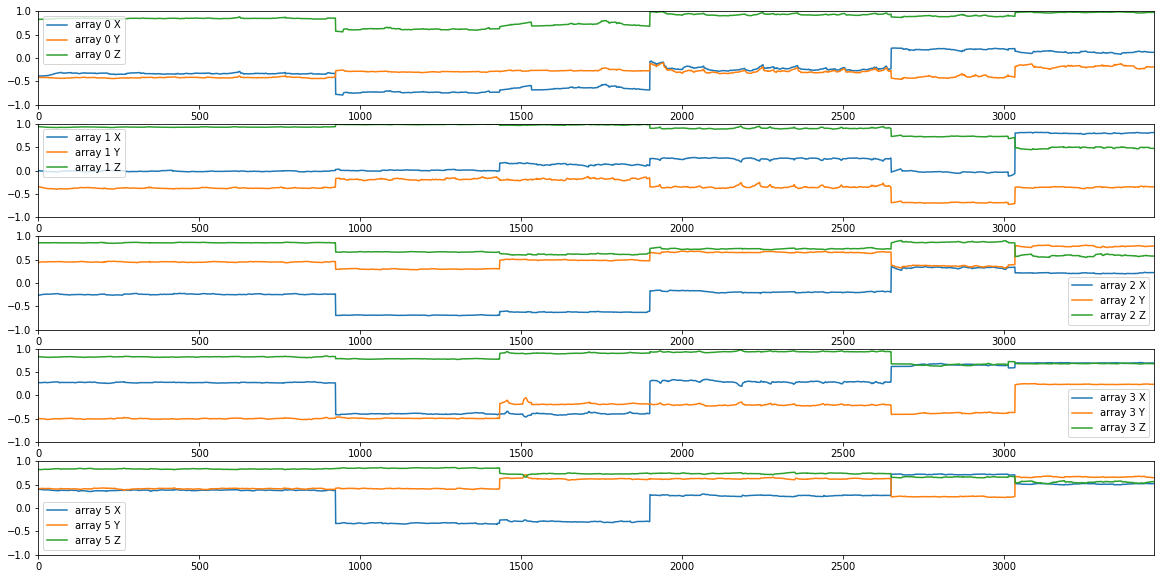

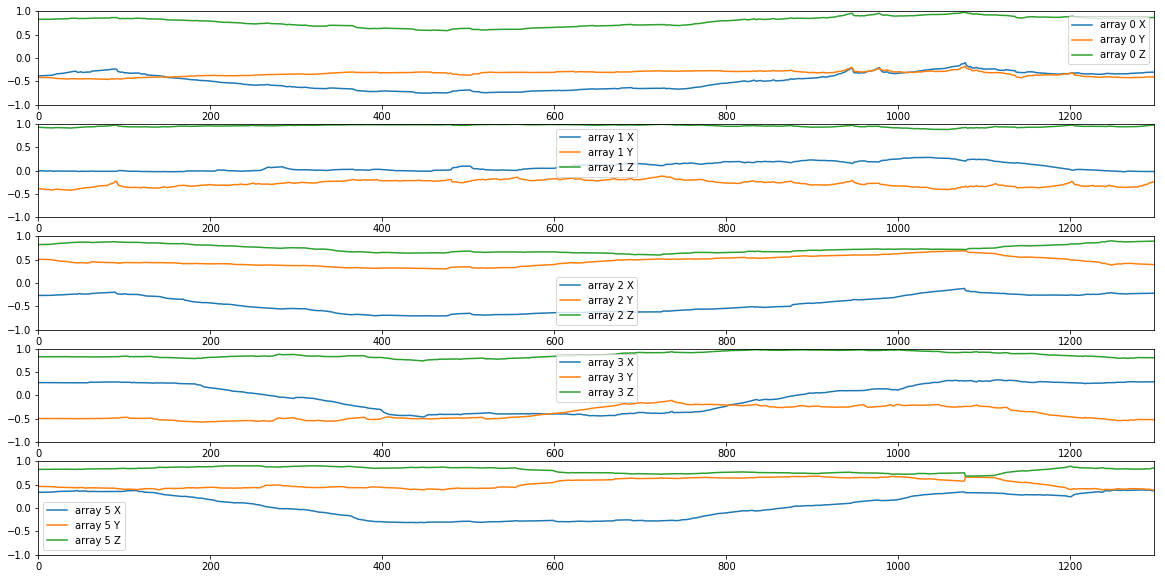

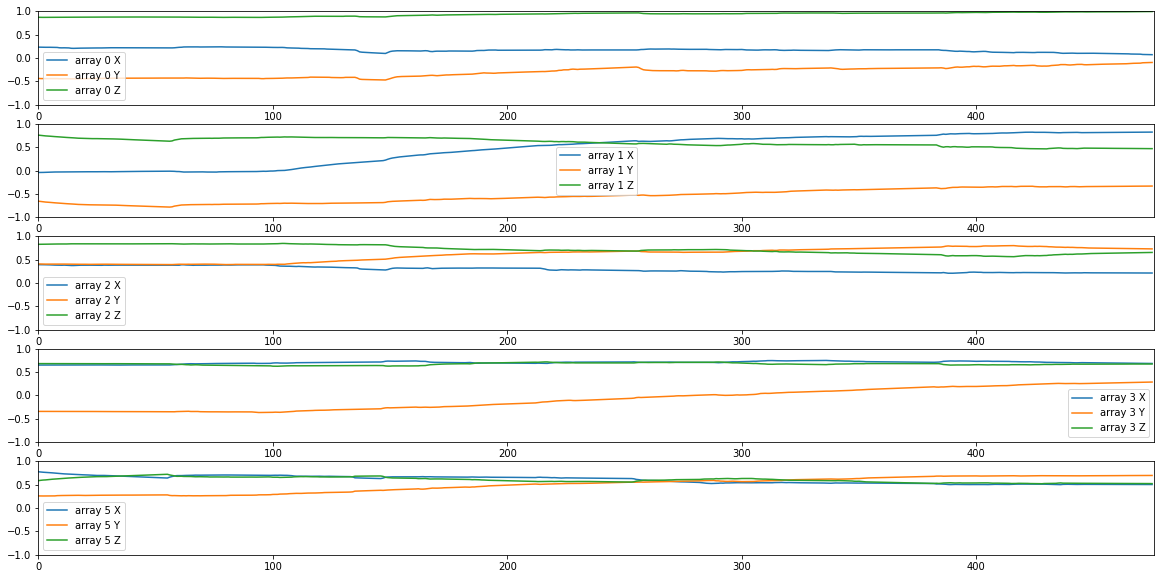

In [5]:
plot_doa_time_series(active_desk_spe_matrix_data,  [0,1,2,3,5])
plot_doa_time_series(active_rec_slide_matrix_data, [0,1,2,3,5])
plot_doa_time_series(active_line_slide_matrix_data,[0,1,2,3,5])

### PCA
annotation:
- `EIGEN_VALUES_CHAIR, EIGEN_VECTORS_CHAIR`: eigenvectors calculated from chair static points experiment data, presaved in the library

usage: 
1. `get_eigen_vectors(active_event_name_matrix_data)`: calculates eigenvectors
2. `get_cdata(active_event_name_matrix_data)`: calculates zero mean centered data
3. `project_to_eigen_vectors(cdata, 2, EIGEN_VALUES, EIGEN_VECTORS)`: calculates the projections onto eigenvectors

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
pwd = '/home/ardelalegre/SoundMapping/Analysis/notebooks/data/'
active_chair_spe_matrix_data = pickle.load(open(pwd+'chairs_cleaned.p','rb'))

In [8]:
EIGEN_VALUES_DESK, EIGEN_VECTORS_DESK = get_eigen_vectors(active_desk_spe_matrix_data)
EIGEN_VALUES_DESK_CHAIR, EIGEN_VECTORS_DESK_CHAIR = get_eigen_vectors(np.vstack([active_desk_spe_matrix_data,
                                                                                 active_chair_spe_matrix_data]))

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


(0, 0.6)

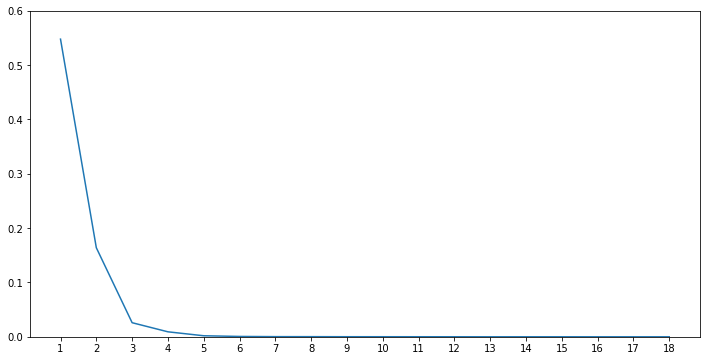

In [76]:
fig = plt.figure(figsize = [12,6])
ax1 = fig.add_subplot(111)
ax1.plot(range(1,19),EIGEN_VALUES_DESK)
# locs, labels = ax1.xticks()
ax1.set_xticks(np.arange(1, 19, step=1))
ax1.set_ylim(0,0.6)
# plt.show()

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


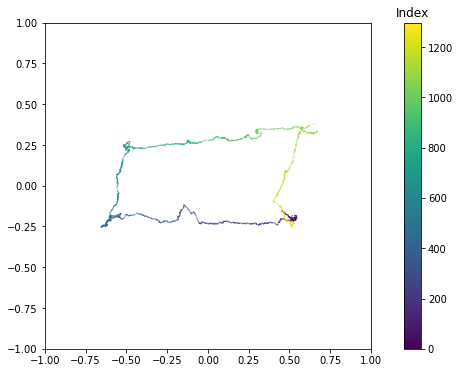

In [57]:
# example using desk_spe
cdata = get_cdata(active_rec_slide_matrix_data)
# projections = project_to_eigen_vectors(cdata, 2, EIGEN_VALUES_CHAIR, EIGEN_VECTORS_CHAIR)
# projections = project_to_eigen_vectors(cdata, 2, EIGEN_VALUES_DESK, EIGEN_VECTORS_DESK)
projections = project_to_eigen_vectors(cdata, 2, EIGEN_VALUES_DESK_CHAIR, EIGEN_VECTORS_DESK_CHAIR)

fig = plt.figure(figsize = [12,6])
# ax1 = fig.add_subplot(121)
# room_model_chair = plt.imread('../room_model_v4.png')
# ax1.imshow(room_model_chair)

ax2 = fig.add_subplot(111)
temp = ax2.scatter(projections[:,0], projections[:,1], c = np.arange(projections.shape[0]), s=0.1)
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax2.set_aspect('equal')
cbar = fig.colorbar(temp, ax=ax2)
cbar.ax.set_title('Index')

plt.show()

### Static Points Linear Mapping & B Matrix
annotation:
- `chair`: static point experiments using chairs
- `desk`: static point experiments using desks
- `desk_chair`: static point experiments using desks and chairs
- `DOA_points_list`: contains names of pickle files, where a list of DOAs is saved. Each element in the list represents a point, containing an array of DOAs.
- `room_coordinates_list`: contains names of pickle files, where an array of room coordinates of points is saved

(DOAs and room coordinates are saved in the same order. DOAs uses **five** arrays)

usage:
1. `generate_linear_transform_matrix(DOA_points, room_coordinates, N)`: calculates N dimensional linear mapping matrix

In [11]:
FILENAME = ['chair','desk','desk_chair']
DOA_points_list = ['chair_points.p', 'desk_points.p', 'desk_chair_points.p']
room_coordinates_list = ['chair_points_room_coordinates.p', 
                         'desk_points_room_coordinates.p',
                         'desk_chair_points_room_coordinates.p']
pwd = '/home/ardelalegre/SoundMapping/Analysis/notebooks/data/'

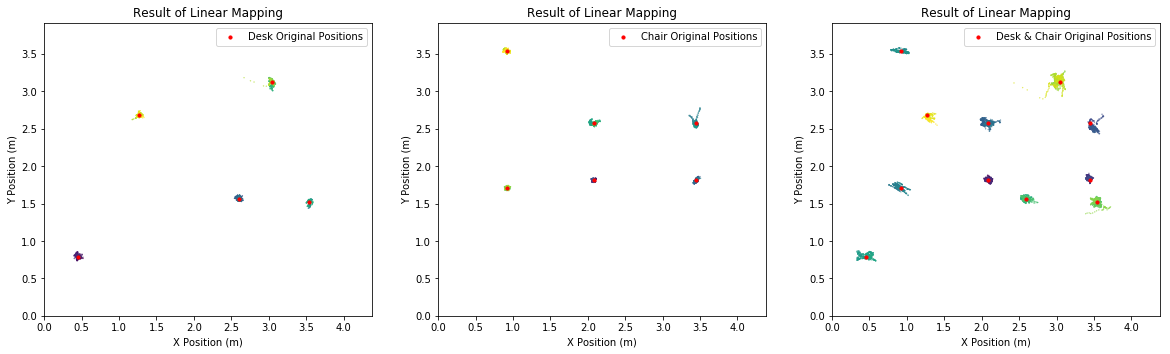

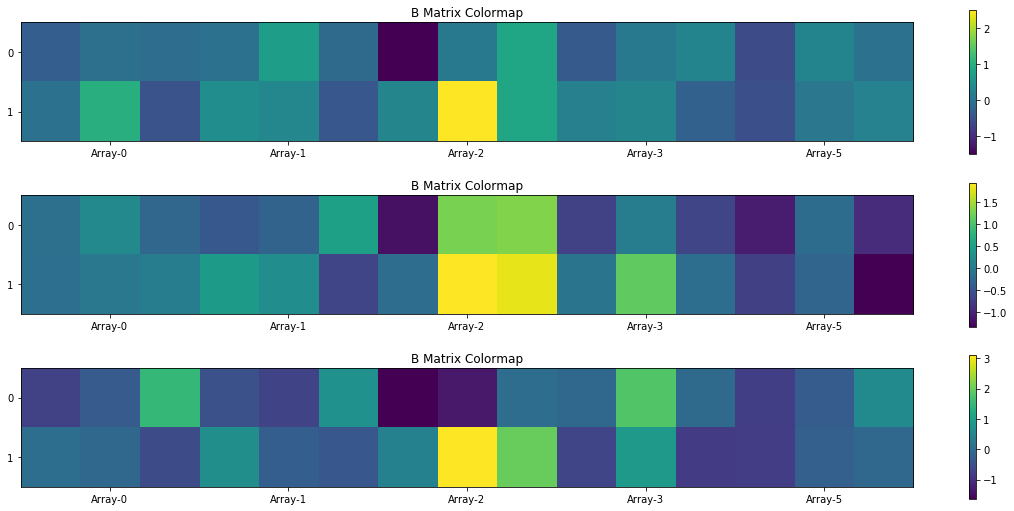

In [12]:
fig1 = plt.figure(figsize = [20,15])
fig2 = plt.figure(figsize = [20,9])
EVENT_LABEL = ['Desk', 'Chair', 'Desk & Chair']

for ii in [0,1,2]:
    # load data
    DOA_points = pickle.load(open(pwd+DOA_points_list[ii],'rb'))
    room_coordinates = pickle.load(open(pwd+room_coordinates_list[ii],'rb'))
    B,R_mean,D_mean,D = generate_linear_transform_matrix(DOA_points, room_coordinates, 2) # 2 dimensional mapping
    # find displacement of mean in room space
    R_0 = R_mean-B @ D_mean
    # affine transform all DOA points
    r = R_0 + B @ D
    # saving
#     pickle.dump([R_0,B],open(pwd+FILENAME[j1]+'_transform_matrix'+'.p','wb'))
    # plotting
    ax1 = fig1.add_subplot(1,3,ii+1)
    ax1.scatter(r[0,:], r[1,:], c = np.arange(r.shape[1]), s = 0.1)
    ax1.set_title("Result of Linear Mapping")
    ax1.set_xlabel("X Position (m)")
    ax1.set_ylabel("Y Position (m)")
    ax1.set_aspect('equal')
    ax1.set(xlim=(0,4.385), ylim=(0,3.918))
    ax1.scatter(room_coordinates[:,0],room_coordinates[:,1], 
                c = 'r', s = 10, label = '{} Original Positions'.format(EVENT_LABEL[ii]))
    ax1.legend();

    ax2 = fig2.add_subplot(3,1,ii+1)
    temp = ax2.imshow(B)
    cbar = fig2.colorbar(temp)
    ax2.set_title("B Matrix Colormap")
    ax2.set_yticks([0, 1])
    ax2.set_xticks(range(1,15,3))
    ax2.set_xticklabels(["Array-0", "Array-1", "Array-2","Array-3","Array-5"])

### Activity/Event Linear Mapping
usage:
1. load mean displacement and B matrix calculated for different events
```python
transform_matrix = pickle.load(open(pwd+EVENTNAME[index]+'_transform_matrix.p','rb'))
R_0, B = transform_matrix[0], transform_matrix[1]
```

Experiment with different points for mapping
In `room_coordinates`, `room_coordinates.shape = (11,3)`. 
1. `room_coordinates[0:4,:]` - points on L-shape table
2. `room_coordinates[4:6,:]` - points on long table
3. `room_coordinates[6:,:]`  - points on chairs in the order of chair2, chair3, chair4, chair5, chair1

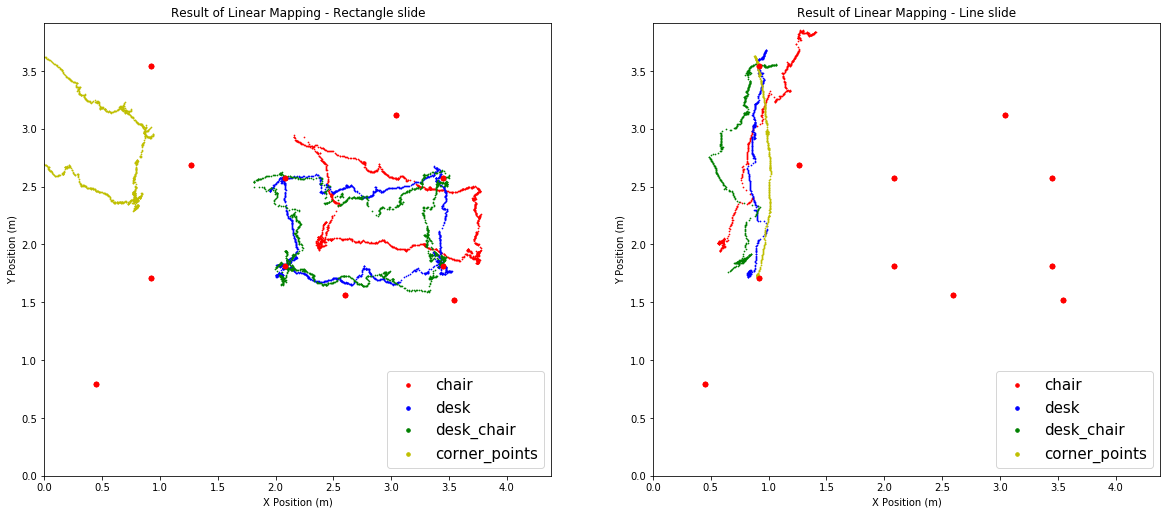

In [56]:
EVENTDOA = [active_rec_slide_DOA, active_line_slide_DOA]
all_DOA_points = pickle.load(open(pwd+'desk_chair_points.p','rb'))
all_room_coordinates = pickle.load(open(pwd+'desk_chair_points_room_coordinates.p','rb'))
# add index of different points to the list
points_index_list = [[6,7,8,9,10],              # chair
                     [0,1,2,3,4,5],             # desk
                     list(range(0,11)),         # desk_chair
                     [4,5,6]]                   # desk_L_table
# add name of different events
EVENT_NAME = ['chair','desk','desk_chair','corner_points']


fig = plt.figure(figsize = [20,16])
color_list = ['r','b','g','y','c']
EVENT_LABEL = ['Rectangle slide', 'Line slide']

for ii in range(2):
    ax = fig.add_subplot(1,2,ii+1)
    ax.set_title("Result of Linear Mapping - " + EVENT_LABEL[ii])
    for jj in range(len(points_index_list)):
        DOA_points = [all_DOA_points[i] for i in points_index_list[jj]]
        room_coordinates = all_room_coordinates[points_index_list[jj],:]
        B,R_mean,D_mean,D = generate_linear_transform_matrix(DOA_points, room_coordinates, 2) # 2 dimensional mapping
        # find displacement of mean in room space
        R_0 = R_mean-B @ D_mean
        event_DOA = EVENTDOA[ii].T
        r = R_0 +B @ event_DOA
        
        ax.scatter(r[0,:], r[1,:], c = color_list[jj], s = 0.5, label =EVENT_NAME[jj])    
        ax.set_xlabel("X Position (m)")
        ax.set_ylabel("Y Position (m)")
        ax.set_aspect('equal')
        ax.set(xlim=(0,4.385), ylim=(0,3.918))
        ax.scatter(all_room_coordinates[:,0],all_room_coordinates[:,1], 
                   c = 'r', s = 20 )
        ax.legend(markerscale=5,fontsize=15);